In [1]:
import numpy as np
import pandas as pd

In [2]:
price_df = pd.read_csv('data/price_df_processed.csv', index_col=0)
price_df.shape

(27143, 15)

In [3]:
apomp_tweets = pd.read_csv("data/apompliano_tweet_processed.csv", index_col=0)
benzig_tweets = pd.read_csv("data/benzinga_tweet_processed.csv", index_col=0)
cnbc_tweets = pd.read_csv("data/cnbc_tweet_processed.csv", index_col=0)
coitel_tweets = pd.read_csv("data/cointelegraph_tweet_processed.csv", index_col=0)
forlive_tweets = pd.read_csv("data/forexlive_tweet_processed.csv", index_col=0)
nicsaz_tweets = pd.read_csv("data/nickszabo4_tweet_processed.csv", index_col=0)
stotwi_tweetss = pd.read_csv("data/stocktwits_tweet_processed.csv", index_col=0)
vitabuk_tweets = pd.read_csv("data/vitalikbuterin_tweet_processed.csv", index_col=0)
wsjmar_tweets = pd.read_csv("data/wsjmarkets_tweet_processed.csv", index_col=0)

In [4]:
coitel_tweets.shape

(25692, 7)

In [5]:
price_df.head()

,btc_open,btc_high,btc_low,btc_close,btc_volume,eth_open,eth_close,eth_low,eth_close.1,eth_volume,ltc_open,ltc_close,ltc_low,ltc_close.1,ltc_volume
btc_date,,,,,,,,,,,,,,,
2017-10-09 09:00:00,4575.4,4589.5,4568.6,4585.7,2878897.86,304.51,305.35,303.88,305.05,952050.50,51.78,52.07,51.52,52.05,365071.71
2017-10-09 10:00:00,4585.7,4619.0,4582.0,4594.9,6134684.09,305.05,307.00,304.35,305.94,872131.28,52.05,52.07,51.84,51.87,277189.05
2017-10-09 11:00:00,4594.9,4618.0,4594.9,4603.0,3401164.60,305.94,307.00,305.03,305.41,989640.11,51.87,51.99,51.70,51.84,269045.08
2017-10-09 12:00:00,4603.0,4610.0,4585.0,4595.5,2625211.20,305.41,305.85,303.94,304.45,1046475.23,51.84,51.93,51.82,51.89,132774.36
2017-10-09 13:00:00,4595.5,4621.0,4585.1,4617.2,5515389.68,304.45,305.51,302.60,303.62,1563333.99,51.89,51.93,51.69,51.85,417317.75


In [6]:
price_df.rename(columns={
    "ltc_close": "ltc_high",
    "ltc_close.1": "ltc_close"
}, inplace=True)

In [7]:
price_df.rename(columns={
    "eth_close": "eth_high",
    "eth_close.1": "eth_close"
}, inplace=True)

In [8]:
price_df.head()

,btc_open,btc_high,btc_low,btc_close,btc_volume,eth_open,eth_high,eth_low,eth_close,eth_volume,ltc_open,ltc_high,ltc_low,ltc_close,ltc_volume
btc_date,,,,,,,,,,,,,,,
2017-10-09 09:00:00,4575.4,4589.5,4568.6,4585.7,2878897.86,304.51,305.35,303.88,305.05,952050.50,51.78,52.07,51.52,52.05,365071.71
2017-10-09 10:00:00,4585.7,4619.0,4582.0,4594.9,6134684.09,305.05,307.00,304.35,305.94,872131.28,52.05,52.07,51.84,51.87,277189.05
2017-10-09 11:00:00,4594.9,4618.0,4594.9,4603.0,3401164.60,305.94,307.00,305.03,305.41,989640.11,51.87,51.99,51.70,51.84,269045.08
2017-10-09 12:00:00,4603.0,4610.0,4585.0,4595.5,2625211.20,305.41,305.85,303.94,304.45,1046475.23,51.84,51.93,51.82,51.89,132774.36
2017-10-09 13:00:00,4595.5,4621.0,4585.1,4617.2,5515389.68,304.45,305.51,302.60,303.62,1563333.99,51.89,51.93,51.69,51.85,417317.75


In [9]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

### Numerical Analysis

In [10]:
main_df = price_df.copy()

In [11]:
main_df.describe()

,btc_open,btc_high,btc_low,btc_close,btc_volume,eth_open,eth_high,eth_low,eth_close,eth_volume,ltc_open,ltc_high,ltc_low,ltc_close,ltc_volume
count,27143.000000,27143.000000,27143.000000,27143.000000,2.714300e+04,27143.000000,27143.00000,27143.000000,27143.000000,2.714300e+04,27143.000000,27143.000000,27143.000000,27143.000000,2.714300e+04
mean,8259.687393,8304.423069,8212.046344,8260.118863,6.956299e+06,320.695447,323.05734,318.140084,320.704100,2.441607e+06,79.751635,80.439140,79.027553,79.752626,6.403552e+05
std,2753.386638,2778.166879,2725.574953,2753.748487,1.189995e+07,223.907613,226.39064,221.098113,223.915715,4.280462e+06,52.009358,52.799015,51.158873,52.011826,1.573813e+06
min,3229.800000,3247.100000,3215.200000,3229.800000,0.000000e+00,83.560000,84.34000,83.000000,83.560000,0.000000e+00,23.100000,23.240000,22.540000,23.100000,0.000000e+00
25%,6479.950000,6500.300000,6458.480000,6479.950000,9.968629e+05,173.160000,174.08000,172.125000,173.160000,3.324872e+05,46.860000,47.090000,46.630000,46.860000,5.430758e+04
50%,8162.000000,8197.000000,8121.000000,8162.050000,2.582122e+06,232.530000,233.58000,231.030000,232.530000,9.638570e+05,59.260000,59.630000,58.850000,59.260000,1.770870e+05
75%,9875.770000,9926.275000,9812.230000,9875.770000,7.527405e+06,394.885000,397.07000,392.500000,394.895000,2.746640e+06,90.375000,91.220000,89.585000,90.375000,5.602391e+05
max,19796.000000,19891.000000,19684.000000,19796.000000,2.541797e+08,1417.400000,1424.30000,1389.800000,1417.400000,1.176974e+08,367.360000,370.780000,361.440000,367.360000,3.206142e+07


BTC Close skewness:  0.5170119399320711
BTC Close kurtosis:  0.6537389183655558


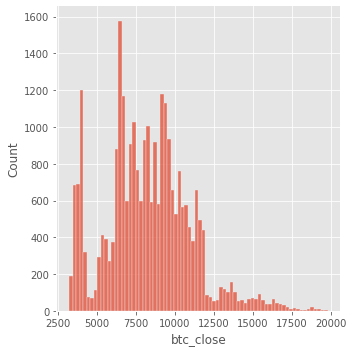

In [12]:
# check btc close distribution
sns.displot(main_df["btc_close"])
print("BTC Close skewness: ", main_df.btc_close.skew())
print("BTC Close kurtosis: ", main_df.btc_close.kurt())

BTC Volume skewness:  4.590468731248601
BTC Volume kurtosis:  36.27791941323771


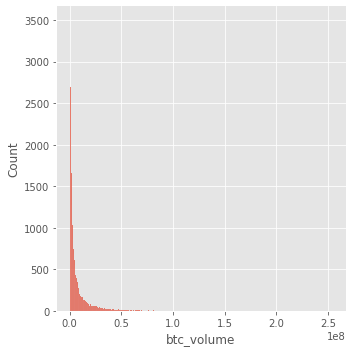

In [13]:
sns.displot(main_df['btc_volume'])
print("BTC Volume skewness: ", main_df.btc_volume.skew())
print("BTC Volume kurtosis: ", main_df.btc_volume.kurt())

ETH Close skewness:  1.8355470860575631
ETH Close kurtosis:  3.42714804301496


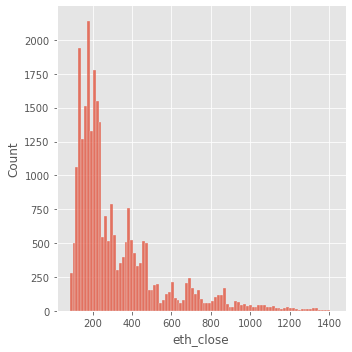

In [14]:
# check eth close distribution
sns.displot(main_df['eth_close'])
print("ETH Close skewness: ", main_df.eth_close.skew())
print("ETH Close kurtosis: ", main_df.eth_close.kurt())

ETH Volume skewness:  5.626811517222034
ETH Volume kurtosis:  61.467871025051124


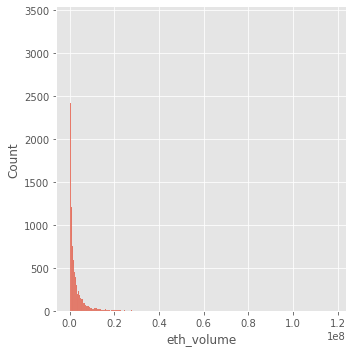

In [15]:
sns.displot(main_df['eth_volume'])
print("ETH Volume skewness: ", main_df.eth_volume.skew())
print("ETH Volume kurtosis: ", main_df.eth_volume.kurt())

LTC Close skewness:  2.052847199342644
LTC Close kurtosis:  4.507964771843643


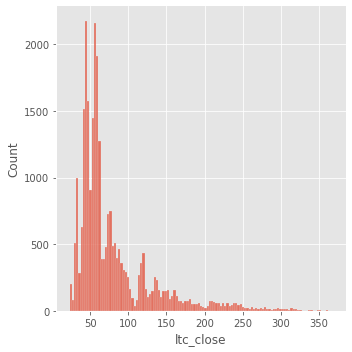

In [16]:
sns.displot(main_df['ltc_close'])
print("LTC Close skewness: ", main_df.ltc_close.skew())
print("LTC Close kurtosis: ", main_df.ltc_close.kurt())

LTC Volume skewness:  7.649857295193836
LTC Volume kurtosis:  86.34588410114142


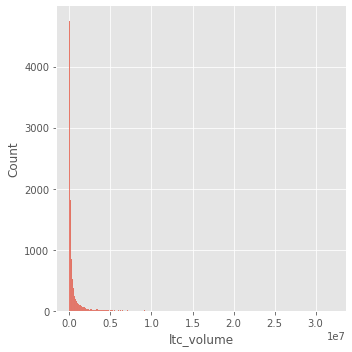

In [17]:
sns.displot(main_df['ltc_volume'])
print("LTC Volume skewness: ", main_df.ltc_volume.skew())
print("LTC Volume kurtosis: ", main_df.ltc_volume.kurt())

#### Close Relationships

<AxesSubplot:xlabel='btc_volume', ylabel='btc_close'>

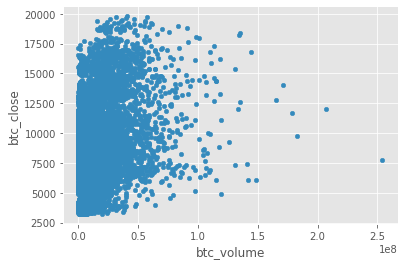

In [18]:
var = "btc_volume"
cp = "btc_close"
data = pd.concat([main_df[cp], main_df[var]], axis=1)
data.plot.scatter(x=var, y=cp)

<AxesSubplot:xlabel='ltc_close', ylabel='btc_close'>

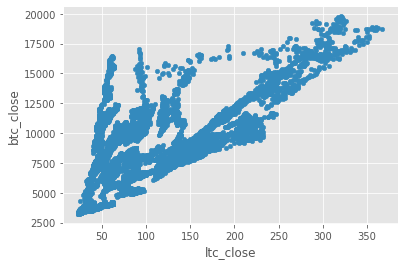

In [19]:
var = "ltc_close"
cp = "btc_close"
data = pd.concat([main_df[cp], main_df[var]], axis=1)
data.plot.scatter(x=var, y=cp)

<AxesSubplot:xlabel='eth_close', ylabel='btc_close'>

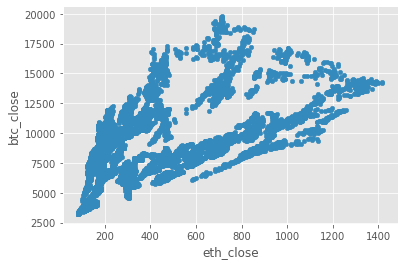

In [20]:
var = "eth_close"
cp = "btc_close"
data = pd.concat([main_df[cp], main_df[var]], axis=1)
data.plot.scatter(x=var, y=cp)

<AxesSubplot:xlabel='ltc_close', ylabel='eth_close'>

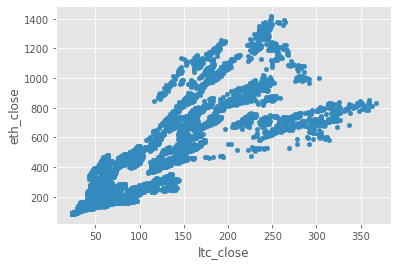

In [21]:
var = "ltc_close"
cp = "eth_close"
data = pd.concat([main_df[cp], main_df[var]], axis=1)
data.plot.scatter(x=var, y=cp)

#### Correlation

<AxesSubplot:>

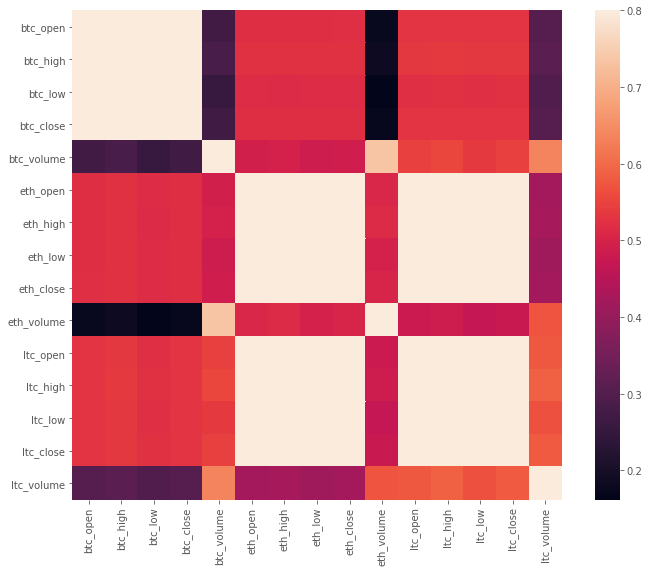

In [22]:
corr_df = main_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_df, vmax=.8, square=True)

### **Textual Analysis**

In [23]:
text_dfs = [
    apomp_tweets,
    benzig_tweets,
    cnbc_tweets,
    coitel_tweets,
    forlive_tweets,
    nicsaz_tweets,
    stotwi_tweetss,
    vitabuk_tweets,
    wsjmar_tweets,
]

In [24]:
text_dfs[0].dropna().head()

,created_at,date,username,replies_count,retweets_count,likes_count,clean_tweet
0,2020-11-14 02:13:14+01:00,2020-11-14,apompliano,0,0,1,yeah forced learning pa christmas gift
1,2020-11-14 02:03:01+01:00,2020-11-14,apompliano,14,6,105,every morning write letter investors happenin...
2,2020-11-13 22:38:56+01:00,2020-11-13,apompliano,26,64,531,capital accrues understand two rules create va...
4,2020-11-13 21:01:17+01:00,2020-11-13,apompliano,39,185,1134,never forget governor new york wrote book well...
5,2020-11-13 20:04:35+01:00,2020-11-13,apompliano,58,21,517,whoever invented spam calls evil


In [25]:
from wordcloud import WordCloud

In [26]:
# for df in text_dfs:
#     temp_df = df.copy()
#     temp_df.clean_tweet = temp_df.clean_tweet.astype(str)
#     word_cloud = WordCloud(width=1200, height=800, background_color="white", min_font_size=10).generate(
#         " ".join(temp_df.clean_tweet.values)
#     )

#     plt.figure(figsize = (12, 8)) 
#     plt.imshow(word_cloud) 
#     plt.title(f"{temp_df.username.iloc[0]} Tweets Word Cloud")
#     plt.axis("off") 
#     #plt.tight_layout(pad = 0) 

#     plt.show()
# #     break

In [27]:
from feature_utils import *

In [28]:
from tqdm import notebook

In [29]:
text_featurized = []
for df in notebook.tqdm(text_dfs):
    temp_df = df.copy()
    temp_df = temp_df.dropna()
    temp_df["has_text"] = temp_df.clean_tweet.apply(lambda row: len(row.split()))
    temp_df = temp_df[temp_df.has_text>0]
    temp_df.drop("has_text", inplace=True, axis=1)
    temp_df.clean_tweet = temp_df.clean_tweet.astype(str)
    new_df = featurize_text(temp_df)
    text_featurized.append(new_df)


Glove.....



(27619, 100)
[['2020-11-14 02:13:14+01:00' '2020-11-14' 'apompliano' 0 0 1
  'yeah forced learning pa christmas gift' 9.0 5.5 38.0
  0.3333333333333333 0.0 0.27 0.459 0.2732 2.1 6.57]
 ['2020-11-14 02:03:01+01:00' '2020-11-14' 'apompliano' 14 6 105
  'every morning write letter  investors happening business finance technology share personal opinion recent events amp means pofolio sign'
  10.0 6.5 135.0 0.4444444444444444 0.05555555555555555 0.0 0.115 0.296
  15.0 11.55]]
  (0, 0)	0.04604572
  (0, 1)	-0.004716067
  (0, 2)	-0.0017247982
  (0, 3)	0.022090733
  (0, 4)	-0.031571247
  (0, 5)	-0.003313084
  (0, 6)	0.104364276
  (0, 7)	0.037319537
  (0, 8)	0.010716901
  (0, 9)	-0.04130983
  (0, 10)	-0.052500334
  (0, 11)	-0.0052998834
  (0, 12)	-0.55229515
  (0, 13)	0.085920095
  (0, 14)	-0.030646415
  (0, 15)	0.024601651
  (0, 16)	-0.037451785
  (0, 17)	0.039435748
  (0, 18)	-0.042208064
  (0, 19)	-0.0451508
  (0, 20)	-0.02173985
  (0, 21)	0.033269703
  (0, 22)	0.0017499005
  (0, 23)	0.00909


Glove.....



(25003, 100)
[['2020-11-14 02:15:00+01:00' '2020-11-14' 'benzinga' 1 2 4
  'covid vaccine makes general electrics stock investable ge' 10.0 6.25
  57.0 0.25 0.0 0.0 0.0 0.0 5.2 7.98]
 ['2020-11-14 01:15:00+01:00' '2020-11-14' 'benzinga' 1 3 8
  'get paid bitcoin shop kroger kr' 7.0 4.333333333333333 31.0 0.5
  0.16666666666666666 0.0 0.0 0.0 0.9 6.57]]
  (0, 0)	-0.011157973
  (0, 1)	-0.013632193
  (0, 2)	0.008242289
  (0, 3)	-0.011726458
  (0, 4)	0.03458254
  (0, 5)	-0.0073892362
  (0, 6)	-0.033683095
  (0, 7)	-0.086974874
  (0, 8)	0.014185741
  (0, 9)	-0.04713424
  (0, 10)	-0.01520763
  (0, 11)	-0.024047477
  (0, 12)	-0.2831611
  (0, 13)	-0.0019531706
  (0, 14)	0.10632209
  (0, 15)	-0.012123235
  (0, 16)	0.01156202
  (0, 17)	0.04580399
  (0, 18)	0.010850191
  (0, 19)	0.0028580478
  (0, 20)	-0.065963
  (0, 21)	0.019068372
  (0, 22)	-0.0020903242
  (0, 23)	-0.0071397917
  (0, 24)	-0.062498637
  :	:
  (1, 75)	0.017818432
  (1, 76)	-0.022202969
  (1, 77)	0.018770201
  (1, 78)	0.052116964


Glove.....



(201548, 100)
[['2020-11-14 03:10:00+01:00' '2020-11-14' 'cnbc' 5 0 10
  '’ financial checklist follow ’ work bills sta piling panership' 9.0
  5.3 62.0 0.2 0.0 0.0 0.0 0.0 8.4 10.45]
 ['2020-11-14 02:59:33+01:00' '2020-11-14' 'cnbc' 35 22 69
  'paying workers stay home weeks could contain pandemic says biden coronavirus advisor'
  11.0 6.083333333333333 84.0 0.25 0.16666666666666666 0.0 0.0 0.0 10.3
  12.13]]
  (0, 0)	0.0075066434
  (0, 1)	-0.0034412188
  (0, 2)	0.0324472
  (0, 3)	-0.006631891
  (0, 4)	0.029984836
  (0, 5)	0.0067024366
  (0, 6)	-0.01598924
  (0, 7)	-0.07432825
  (0, 8)	-0.011553915
  (0, 9)	-0.020304903
  (0, 10)	-0.017708745
  (0, 11)	-0.0092409365
  (0, 12)	-0.37818092
  (0, 13)	0.038140718
  (0, 14)	-0.035531938
  (0, 15)	-0.0430372
  (0, 16)	-0.06930985
  (0, 17)	0.027636897
  (0, 18)	-0.047321428
  (0, 19)	-0.06706665
  (0, 20)	-0.044225775
  (0, 21)	-0.023378849
  (0, 22)	0.007475441
  (0, 23)	0.042706348
  (0, 24)	-0.012925562
  :	:
  (1, 75)	0.015536957
  (1,


Glove.....



(25252, 100)
[['2020-11-14 00:18:37+01:00' '2020-11-14' 'cointelegraph' 3 3 21
  'sheila warren world economic forum paying close attention developments china singles africa caribbean region exciting hotbeds'
  12.0 6.875 125.0 0.3125 0.0625 0.0 0.176 0.4939 15.4 13.31]
 ['2020-11-13 22:40:02+01:00' '2020-11-13' 'cointelegraph' 8 11 34
  'key component digital currency freedoms physical money industry leaders say repos'
  9.0 6.454545454545454 81.0 0.2727272727272727 0.09090909090909091 0.0
  0.18 0.296 15.8 15.67]]
  (0, 0)	-0.001784089
  (0, 1)	-0.023310049
  (0, 2)	-0.0059838817
  (0, 3)	-0.023808002
  (0, 4)	-0.021334717
  (0, 5)	0.011085234
  (0, 6)	0.025980929
  (0, 7)	-0.025555268
  (0, 8)	0.02054335
  (0, 9)	-0.08372863
  (0, 10)	-0.0022068974
  (0, 11)	-0.037020683
  (0, 12)	-0.46417463
  (0, 13)	-0.008884244
  (0, 14)	0.059950314
  (0, 15)	-0.037143648
  (0, 16)	-0.012873026
  (0, 17)	-0.018161641
  (0, 18)	-0.005340834
  (0, 19)	0.004782289
  (0, 20)	0.01724314
  (0, 21)	-0


Glove.....



(96615, 100)
[['2020-11-13 22:50:07+01:00' '2020-11-13' 'forexlive' 0 0 3
  'forexlive americas fx news wrap consumer sentiment slides' 9.0 6.25
  57.0 0.25 0.0 0.0 0.0 0.0 8.8 9.95]
 ['2020-11-13 22:38:28+01:00' '2020-11-13' 'forexlive' 0 3 13
  'trump time tell takes office january' 7.0 5.166666666666667 36.0 0.5
  0.3333333333333333 0.0 0.0 0.0 4.5 0.3]]
  (0, 0)	0.09043505
  (0, 1)	-0.052714016
  (0, 2)	0.0010820143
  (0, 3)	-0.08689901
  (0, 4)	0.001847412
  (0, 5)	-0.036898818
  (0, 6)	0.01443035
  (0, 7)	-0.12108685
  (0, 8)	0.05678219
  (0, 9)	-0.10792573
  (0, 10)	-0.008765988
  (0, 11)	-0.0028803106
  (0, 12)	-0.32844472
  (0, 13)	0.04880271
  (0, 14)	0.0047596246
  (0, 15)	0.009106149
  (0, 16)	-0.046252985
  (0, 17)	0.053447176
  (0, 18)	0.034947492
  (0, 19)	-0.04353219
  (0, 20)	-0.02853785
  (0, 21)	-0.002945463
  (0, 22)	0.009729073
  (0, 23)	0.03599926
  (0, 24)	-0.054476924
  :	:
  (1, 75)	0.016562834
  (1, 76)	0.027006583
  (1, 77)	0.026399883
  (1, 78)	0.005592234



Glove.....



(10014, 100)
[['2020-11-14 03:11:57+01:00' '2020-11-14' 'nickszabo4' 0 0 2
  'two dont care republicans lose power federally seriously dont care'
  11.0 5.7 66.0 0.5 0.1 0.457 0.148 -0.5716 11.9 8.87]
 ['2020-11-14 02:36:06+01:00' '2020-11-14' 'nickszabo4' 1 0 66
  'thanksgiving whether' 12.0 9.5 20.0 0.0 0.5 0.0 0.0 0.0 8.8 0.1]]
  (0, 0)	-0.0033088601
  (0, 1)	0.059355535
  (0, 2)	0.011208751
  (0, 3)	0.04234855
  (0, 4)	0.00203951
  (0, 5)	0.01982566
  (0, 6)	0.07305324
  (0, 7)	0.00966923
  (0, 8)	0.02465934
  (0, 9)	0.06064243
  (0, 10)	-0.020893741
  (0, 11)	-0.08213331
  (0, 12)	-0.6043519
  (0, 13)	0.04014639
  (0, 14)	0.00517361
  (0, 15)	0.031219628
  (0, 16)	-0.04348895
  (0, 17)	-0.03611934
  (0, 18)	-0.00236035
  (0, 19)	-0.0057248394
  (0, 20)	0.03091158
  (0, 21)	0.02123606
  (0, 22)	-0.013723299
  (0, 23)	0.0527501
  (0, 24)	-0.011117831
  :	:
  (1, 75)	0.0496424
  (1, 76)	-0.0118477
  (1, 77)	0.02337655
  (1, 78)	0.073652804
  (1, 79)	0.0675402
  (1, 80)	0.2359429
  (


Glove.....



(8127, 100)
[['2020-11-14 00:14:19+01:00' '2020-11-14' 'stocktwits' 3 3 35
  'daily rip highest close ever' 7.0 4.8 28.0 0.8 0.2 0.0 0.0 0.0 5.2
  7.04]
 ['2020-11-13 22:13:09+01:00' '2020-11-13' 'stocktwits' 3 0 10 'idk' 3.0
  3.0 3.0 0.0 0.0 1.0 0.0 -0.1027 -3.5 0.05]]
  (0, 0)	-0.0041358005
  (0, 1)	0.006572922
  (0, 2)	0.031797998
  (0, 3)	-0.05376814
  (0, 4)	0.033876203
  (0, 5)	-0.06411492
  (0, 6)	0.04794232
  (0, 7)	0.00390846
  (0, 8)	-0.038895518
  (0, 9)	0.0078011802
  (0, 10)	-0.00047713966
  (0, 11)	0.0027033198
  (0, 12)	-0.6245664
  (0, 13)	-0.0049006804
  (0, 14)	-0.03094342
  (0, 15)	0.0642786
  (0, 16)	0.01494402
  (0, 17)	0.01278692
  (0, 18)	-0.0071290405
  (0, 19)	-0.02320176
  (0, 20)	0.011924939
  (0, 21)	-0.006297478
  (0, 22)	0.00557252
  (0, 23)	-0.052898925
  (0, 24)	0.032707475
  :	:
  (1, 75)	0.0020037
  (1, 76)	0.0400157
  (1, 77)	0.0936374
  (1, 78)	0.033781
  (1, 79)	0.0479932
  (1, 80)	0.19405
  (1, 81)	-0.0095608
  (1, 82)	-0.0966265
  (1, 83)	-0.120


Glove.....



(9735, 100)
[['2020-11-13 17:10:09+01:00' '2020-11-13' 'vitalikbuterin' 13 5 187
  'im gon na buck trends proudly keep independent self hosted blog' 11.0
  4.818181818181818 63.0 0.18181818181818182 0.0 0.0 0.265 0.5574 6.4
  8.49]
 ['2020-11-13 07:43:25+01:00' '2020-11-13' 'vitalikbuterin' 1 0 4
  'ah looked name meant ragnar danneskjöld' 11.0 5.666666666666667 39.0
  0.5 0.0 0.0 0.0 0.0 2.1 9.2]]
  (0, 0)	-0.031511657
  (0, 1)	0.011943836
  (0, 2)	-0.012042618
  (0, 3)	-0.038003672
  (0, 4)	-0.015864182
  (0, 5)	-0.01706881
  (0, 6)	0.031395864
  (0, 7)	-0.03406637
  (0, 8)	-0.030658262
  (0, 9)	-0.013087752
  (0, 10)	-0.04175332
  (0, 11)	-0.029570319
  (0, 12)	-0.5266554
  (0, 13)	0.029574608
  (0, 14)	0.012456474
  (0, 15)	0.0063881725
  (0, 16)	-0.013262608
  (0, 17)	0.027111864
  (0, 18)	0.04296842
  (0, 19)	-0.064887635
  (0, 20)	0.031798672
  (0, 21)	0.01755401
  (0, 22)	0.011496781
  (0, 23)	0.012532765
  (0, 24)	-0.012652155
  :	:
  (1, 75)	-0.0018965738
  (1, 76)	0.0546394


Glove.....



(22087, 100)
[['2020-11-14 00:58:03+01:00' '2020-11-14' 'wsjmarkets' 0 3 8
  'heard street doordash may face dim reception uber lyft got listed shares last year'
  9.0 4.928571428571429 82.0 0.5714285714285714 0.14285714285714285 0.0
  0.145 0.296 6.4 7.71]
 ['2020-11-14 00:39:03+01:00' '2020-11-14' 'wsjmarkets' 0 2 7
  'overheard gun stocks vix surged election tumbled since' 9.0 5.875 54.0
  0.25 0.125 0.255 0.0 -0.34 4.1 9.95]]
  (0, 0)	0.014856799
  (0, 1)	0.049256664
  (0, 2)	-0.0011712983
  (0, 3)	-0.03483907
  (0, 4)	0.016376618
  (0, 5)	-0.034168012
  (0, 6)	-0.0056051584
  (0, 7)	-0.012475989
  (0, 8)	0.008198748
  (0, 9)	-0.021013197
  (0, 10)	-0.014560894
  (0, 11)	-0.008893033
  (0, 12)	-0.4738352
  (0, 13)	-0.02456123
  (0, 14)	0.047598552
  (0, 15)	0.01660005
  (0, 16)	0.008927518
  (0, 17)	0.01059264
  (0, 18)	-0.027696202
  (0, 19)	-0.018307788
  (0, 20)	0.020708716
  (0, 21)	0.004324373
  (0, 22)	-0.013253925
  (0, 23)	-0.0061248015
  (0, 24)	-0.0065048817
  :	:
  (1, 

In [30]:
text_featurized[0].tail(10)

,created_at,date,username,replies_count,retweets_count,likes_count,clean_tweet,longest_word_length,mean_word_length,length_in_chars,...,glove_90,glove_91,glove_92,glove_93,glove_94,glove_95,glove_96,glove_97,glove_98,glove_99
27609,2017-10-10 15:34:53+01:00,2017-10-10,apompliano,0,0,0,made actually laugh loud thank joy,8,4.83333,34,...,0.032021,0.021914,0.045286,0.000653,-0.048584,-0.040571,-0.001049,-0.083428,0.034372,-0.046132
27610,2017-10-10 15:33:05+01:00,2017-10-10,apompliano,1,0,0,woh reading im guessing,8,5,23,...,0.047912,0.040789,-0.029080,-0.010294,-0.092675,-0.003800,0.022075,0.059831,0.091781,-0.047231
27611,2017-10-10 15:17:18+01:00,2017-10-10,apompliano,1,0,2,confidence gift curse,10,6.33333,21,...,0.027911,-0.010837,0.030829,0.052020,0.012291,-0.072269,-0.054992,-0.070518,0.052147,0.026765
27612,2017-10-10 15:14:06+01:00,2017-10-10,apompliano,4,28,159,never confuse luck skill look sma sho term dum...,7,4.3,52,...,0.010317,0.067721,-0.031570,0.008315,0.027617,-0.010297,0.026601,0.017345,0.001589,-0.009507
27613,2017-10-09 23:38:17+01:00,2017-10-09,apompliano,14,72,320,hope tesla spacex boring company amp neuralink...,10,6.46154,96,...,0.027365,0.058736,0.042862,0.011971,0.043604,-0.037862,-0.002889,-0.047078,-0.035168,-0.025657
27614,2017-10-09 15:55:53+01:00,2017-10-09,apompliano,0,0,1,always time new friends matter young well behaved,7,5.25,49,...,0.007322,0.037612,-0.022311,0.029969,0.020557,-0.000064,0.031575,0.016956,-0.011692,-0.009595
27615,2017-10-09 15:40:04+01:00,2017-10-09,apompliano,2,3,38,think bigger,6,5.5,12,...,-0.055749,-0.006022,0.065094,0.017648,-0.037048,-0.003521,-0.001911,-0.053984,0.090776,-0.077931
27616,2017-10-09 13:42:06+01:00,2017-10-09,apompliano,0,0,3,thank making let know help internship selection,10,5.85714,47,...,-0.029617,0.034046,0.028067,-0.036563,-0.017960,-0.011857,0.030804,0.014154,0.031873,-0.020341
27617,2017-10-09 13:25:21+01:00,2017-10-09,apompliano,4,32,105,student programmed google home allow apply goo...,10,6.41667,88,...,-0.013524,0.054104,0.028247,-0.023481,0.044683,-0.026312,0.019273,0.013711,0.015654,-0.026811
27618,2017-10-09 01:05:22+01:00,2017-10-09,apompliano,2,41,184,responsible information put brain choose wisely,11,7,47,...,0.005882,0.016077,0.042897,0.024274,0.003057,-0.018396,0.014594,-0.001052,0.028308,-0.011649


In [31]:
text_featurized[0].isnull().any()

created_at        False
date              False
username          False
replies_count     False
retweets_count    False
                  ...  
glove_95          False
glove_96          False
glove_97          False
glove_98          False
glove_99          False
Length: 117, dtype: bool

In [32]:
# save processed text dfs
for df in text_featurized:
    df.to_csv(f"data/{df.username.iloc[0]}_tweet_featurized.csv")

In [10]:
# load featurized text data
apomp_tweets = pd.read_csv("data/apompliano_tweet_featurized.csv", index_col=0)
benzig_tweets = pd.read_csv("data/benzinga_tweet_featurized.csv", index_col=0)
cnbc_tweets = pd.read_csv("data/cnbc_tweet_featurized.csv", index_col=0)
coitel_tweets = pd.read_csv("data/cointelegraph_tweet_featurized.csv", index_col=0)
forlive_tweets = pd.read_csv("data/forexlive_tweet_featurized.csv", index_col=0)
nicsaz_tweets = pd.read_csv("data/nickszabo4_tweet_featurized.csv", index_col=0)
stotwi_tweetss = pd.read_csv("data/stocktwits_tweet_featurized.csv", index_col=0)
vitabuk_tweets = pd.read_csv("data/vitalikbuterin_tweet_featurized.csv", index_col=0)
wsjmar_tweets = pd.read_csv("data/wsjmarkets_tweet_featurized.csv", index_col=0)

In [12]:
apomp_tweets.head()

,created_at,date,username,replies_count,retweets_count,likes_count,clean_tweet,longest_word_length,mean_word_length,length_in_chars,...,glove_90,glove_91,glove_92,glove_93,glove_94,glove_95,glove_96,glove_97,glove_98,glove_99
0,2020-11-14 02:13:14+01:00,2020-11-14,apompliano,0,0,1,yeah forced learning pa christmas gift,9.0,5.500000,38.0,...,0.000043,0.008397,-0.007391,0.017256,0.012716,-0.057849,-0.027483,0.004191,0.015250,-0.054018
1,2020-11-14 02:03:01+01:00,2020-11-14,apompliano,14,6,105,every morning write letter investors happenin...,10.0,6.500000,135.0,...,-0.039586,0.049075,0.017374,0.008979,0.022221,-0.034642,0.020128,-0.006210,-0.018029,0.002119
2,2020-11-13 22:38:56+01:00,2020-11-13,apompliano,26,64,531,capital accrues understand two rules create va...,10.0,6.000000,62.0,...,-0.033977,0.073322,0.008140,-0.010358,0.056103,-0.031281,-0.003031,-0.019310,-0.040316,0.011163
3,2020-11-13 21:01:17+01:00,2020-11-13,apompliano,39,185,1134,never forget governor new york wrote book well...,11.0,5.761905,141.0,...,-0.015612,0.027804,0.001320,-0.039103,0.000623,0.007244,0.003791,-0.003482,0.015870,-0.029498
4,2020-11-13 20:04:35+01:00,2020-11-13,apompliano,58,21,517,whoever invented spam calls evil,8.0,5.600000,32.0,...,-0.027748,-0.008611,-0.074998,0.062824,-0.041326,-0.046662,-0.050564,-0.039395,0.045774,-0.022069


In [13]:
apomp_tweets.columns

Index(['created_at', 'date', 'username', 'replies_count', 'retweets_count',
       'likes_count', 'clean_tweet', 'longest_word_length', 'mean_word_length',
       'length_in_chars',
       ...
       'glove_90', 'glove_91', 'glove_92', 'glove_93', 'glove_94', 'glove_95',
       'glove_96', 'glove_97', 'glove_98', 'glove_99'],
      dtype='object', length=117)

In [35]:
# resample text data to daily and sum columns
temp_df = apomp_tweets.copy()

In [36]:
temp_df.head()

,created_at,date,username,replies_count,retweets_count,likes_count,clean_tweet,longest_word_length,mean_word_length,length_in_chars,...,glove_90,glove_91,glove_92,glove_93,glove_94,glove_95,glove_96,glove_97,glove_98,glove_99
0,2020-11-14 02:13:14+01:00,2020-11-14,apompliano,0,0,1,yeah forced learning pa christmas gift,9.0,5.500000,38.0,...,0.000043,0.008397,-0.007391,0.017256,0.012716,-0.057849,-0.027483,0.004191,0.015250,-0.054018
1,2020-11-14 02:03:01+01:00,2020-11-14,apompliano,14,6,105,every morning write letter investors happenin...,10.0,6.500000,135.0,...,-0.039586,0.049075,0.017374,0.008979,0.022221,-0.034642,0.020128,-0.006210,-0.018029,0.002119
2,2020-11-13 22:38:56+01:00,2020-11-13,apompliano,26,64,531,capital accrues understand two rules create va...,10.0,6.000000,62.0,...,-0.033977,0.073322,0.008140,-0.010358,0.056103,-0.031281,-0.003031,-0.019310,-0.040316,0.011163
3,2020-11-13 21:01:17+01:00,2020-11-13,apompliano,39,185,1134,never forget governor new york wrote book well...,11.0,5.761905,141.0,...,-0.015612,0.027804,0.001320,-0.039103,0.000623,0.007244,0.003791,-0.003482,0.015870,-0.029498
4,2020-11-13 20:04:35+01:00,2020-11-13,apompliano,58,21,517,whoever invented spam calls evil,8.0,5.600000,32.0,...,-0.027748,-0.008611,-0.074998,0.062824,-0.041326,-0.046662,-0.050564,-0.039395,0.045774,-0.022069


In [25]:
text_dfs = [
    apomp_tweets,
    benzig_tweets,
    cnbc_tweets,
    coitel_tweets,
    forlive_tweets,
    nicsaz_tweets,
    stotwi_tweetss,
    vitabuk_tweets,
    wsjmar_tweets,
]

In [32]:
text_resampled = []
for df in text_dfs:
    temp_df = df.copy()
    temp_username = temp_df.username.iloc[0]
    temp_df['created_at'] = pd.to_datetime(temp_df['created_at'])
    temp_df.drop("date", inplace=True, axis=1)
    temp_df.set_index('created_at', inplace=True)
    temp_df_columns = [f"{temp_username}_{col}" for col in temp_df.columns]
    temp_glove_cols = [col for col in temp_df_columns if "glove" in col.split("_")]
    col_agg = {
        col: [np.sum, np.mean, np.max, np.min] for col in temp_df_columns if col not in temp_glove_cols
    }
    glove_agg = {
        col: [np.mean] for col in temp_glove_cols
    }
    col_agg[f"{temp_username}_username"] = lambda x: temp_username
    col_agg[f"{temp_username}_clean_tweet"] = lambda x: "-".join(x)
    temp_df.columns = temp_df_columns
    aggregate = {**col_agg, **glove_agg}
    temp_df_resampled = temp_df.resample('d').agg(aggregate)
    print(f"{temp_username} df shape: {temp_df_resampled.shape}")
    temp_df_resampled["date"] = temp_df_resampled.index.date
    text_resampled.append(temp_df_resampled)
#     break

apompliano df shape: (1133, 154)
benzinga df shape: (1133, 154)
cnbc df shape: (1133, 154)
cointelegraph df shape: (1133, 154)
forexlive df shape: (1132, 154)
nickszabo4 df shape: (1133, 154)
stocktwits df shape: (1133, 154)
vitalikbuterin df shape: (1132, 154)
wsjmarkets df shape: (1133, 154)


In [33]:
text_resampled[0].head()

apompliano_username apompliano_replies_count  \
                                     <lambda>                      sum   
created_at                                                               
2017-10-09 00:00:00+01:00          apompliano                       22   
2017-10-10 00:00:00+01:00          apompliano                       11   
2017-10-11 00:00:00+01:00          apompliano                       47   
2017-10-12 00:00:00+01:00          apompliano                       15   
2017-10-13 00:00:00+01:00          apompliano                       28   

                                               apompliano_retweets_count  \
                               mean  amax amin                       sum   
created_at                                                                 
2017-10-09 00:00:00+01:00  3.666667  14.0  0.0                       148   
2017-10-10 00:00:00+01:00  1.375000   4.0  0.0                        43   
2017-10-11 00:00:00+01:00  3.133333  25.0  0.0                        99   
2017-10-12 00:00:00+01:00  5.000000  10.0  1.0                        56   
2017-10-13 00:00:00+01:00  1.473684  13.0  0.0                        72   

                                                apompliano_likes_count  ...  \
                                mean  amax amin                    sum  ...   
created_at                                                              ...   
2017-10-09 00:00:00+01:00  24.666667  72.0  0.0                    651  ...   
2017-10-10 00:00:00+01:00   5.375000  28.0  0.0                    241  ...   
2017-10-11 00:00:00+01:00   6.600000  52.0  0.0                    307  ...   
2017-10-12 00:00:00+01:00  18.666667  39.0  1.0                    255  ...   
2017-10-13 00:00:00+01:00   3.789474  39.0  0.0                    398  ...   

                          apompliano_glove_91 apompliano_glove_92  \
                                         mean                mean   
created_at                                                          
2017-10-09 00:00:00+01:00            0.032426            0.030809   
2017-10-10 00:00:00+01:00            0.050719            0.019329   
2017-10-11 00:00:00+01:00            0.035757            0.016897   
2017-10-12 00:00:00+01:00            0.009368           -0.000309   
2017-10-13 00:00:00+01:00            0.029108            0.005349   

                          apompliano_glove_93 apompliano_glove_94  \
                                         mean                mean   
created_at                                                          
2017-10-09 00:00:00+01:00            0.003970            0.009482   
2017-10-10 00:00:00+01:00           -0.003970           -0.010555   
2017-10-11 00:00:00+01:00           -0.007471           -0.028072   
2017-10-12 00:00:00+01:00           -0.007828            0.040314   
2017-10-13 00:00:00+01:00           -0.004102            0.005091   

                          apompliano_glove_95 apompliano_glove_96  \
                                         mean                mean   
created_at                                                          
2017-10-09 00:00:00+01:00           -0.016335            0.015241   
2017-10-10 00:00:00+01:00           -0.020416           -0.010941   
2017-10-11 00:00:00+01:00           -0.007094            0.005314   
2017-10-12 00:00:00+01:00           -0.029226            0.016618   
2017-10-13 00:00:00+01:00           -0.024731           -0.003128   

                          apompliano_glove_97 apompliano_glove_98  \
                                         mean                mean   
created_at                                                          
2017-10-09 00:00:00+01:00           -0.009549            0.019959   
2017-10-10 00:00:00+01:00           -0.006006            0.034806   
2017-10-11 00:00:00+01:00           -0.000399            0.021387   
2017-10-12 00:00:00+01:00           -0.037238           -0.026612   
2017-10-13 00:00:00+01:00           -0.014599    

In [34]:
price_df.head()

,btc_open,btc_high,btc_low,btc_close,btc_volume,eth_open,eth_high,eth_low,eth_close,eth_volume,ltc_open,ltc_high,ltc_low,ltc_close,ltc_volume
btc_date,,,,,,,,,,,,,,,
2017-10-09 09:00:00,4575.4,4589.5,4568.6,4585.7,2878897.86,304.51,305.35,303.88,305.05,952050.50,51.78,52.07,51.52,52.05,365071.71
2017-10-09 10:00:00,4585.7,4619.0,4582.0,4594.9,6134684.09,305.05,307.00,304.35,305.94,872131.28,52.05,52.07,51.84,51.87,277189.05
2017-10-09 11:00:00,4594.9,4618.0,4594.9,4603.0,3401164.60,305.94,307.00,305.03,305.41,989640.11,51.87,51.99,51.70,51.84,269045.08
2017-10-09 12:00:00,4603.0,4610.0,4585.0,4595.5,2625211.20,305.41,305.85,303.94,304.45,1046475.23,51.84,51.93,51.82,51.89,132774.36
2017-10-09 13:00:00,4595.5,4621.0,4585.1,4617.2,5515389.68,304.45,305.51,302.60,303.62,1563333.99,51.89,51.93,51.69,51.85,417317.75


In [50]:
from functools import reduce
all_texts = reduce(lambda x, y: pd.merge(x, y, on="date"), text_resampled)

In [51]:
all_texts.head()

apompliano_username apompliano_replies_count                       \
             <lambda>                      sum      mean  amax amin   
0          apompliano                       22  3.666667  14.0  0.0   
1          apompliano                       11  1.375000   4.0  0.0   
2          apompliano                       47  3.133333  25.0  0.0   
3          apompliano                       15  5.000000  10.0  1.0   
4          apompliano                       28  1.473684  13.0  0.0   

  apompliano_retweets_count                       apompliano_likes_count  ...  \
                        sum       mean  amax amin                    sum  ...   
0                       148  24.666667  72.0  0.0                    651  ...   
1                        43   5.375000  28.0  0.0                    241  ...   
2                        99   6.600000  52.0  0.0                    307  ...   
3                        56  18.666667  39.0  1.0                    255  ...   
4                        72   3.789474  39.0  0.0                    398  ...   

  wsjmarkets_glove_90 wsjmarkets_glove_91 wsjmarkets_glove_92  \
                 mean                mean                mean   
0           -0.038090            0.003975            0.017523   
1           -0.029696            0.007935            0.027809   
2           -0.028578            0.001834            0.016067   
3           -0.019188           -0.003204            0.015977   
4           -0.023207            0.001585            0.008055   

  wsjmarkets_glove_93 wsjmarkets_glove_94 wsjmarkets_glove_95  \
                 mean                mean                mean   
0            0.011526            0.008771           -0.028889   
1           -0.008519            0.015986           -0.034455   
2           -0.020051            0.026035           -0.024766   
3           -0.021352            0.031633           -0.019565   
4           -0.020167            0.021015           -0.016212   

  wsjmarkets_glove_96 wsjmarkets_glove_97 wsjmarkets_glove_98  \
                 mean                mean                mean   
0           -0.004696            0.001825            0.027225   
1           -0.006765           -0.009797           -0.001018   
2            0.011662           -0.015122            0.006323   
3            0.013525           -0.017305           -0.006587   
4            0.005978           -0.007875           -0.015320   

  wsjmarkets_glove_99  
                 mean  
0            0.018111  
1            0.005475  
2           -0.006374  
3           -0.008486  
4           -0.008568  

[5 rows x 1387 columns]

In [52]:
all_texts.shape

(1132, 1387)

In [38]:
all_texts.to_csv("data/all_text_features.csv")

In [54]:
all_texts.set_index('date', inplace=True)

### Merge with price data

In [39]:
price_df.columns

Index(['btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume',
       'eth_open', 'eth_high', 'eth_low', 'eth_close', 'eth_volume',
       'ltc_open', 'ltc_high', 'ltc_low', 'ltc_close', 'ltc_volume'],
      dtype='object')

In [40]:
price_df.head()

,btc_open,btc_high,btc_low,btc_close,btc_volume,eth_open,eth_high,eth_low,eth_close,eth_volume,ltc_open,ltc_high,ltc_low,ltc_close,ltc_volume
btc_date,,,,,,,,,,,,,,,
2017-10-09 09:00:00,4575.4,4589.5,4568.6,4585.7,2878897.86,304.51,305.35,303.88,305.05,952050.50,51.78,52.07,51.52,52.05,365071.71
2017-10-09 10:00:00,4585.7,4619.0,4582.0,4594.9,6134684.09,305.05,307.00,304.35,305.94,872131.28,52.05,52.07,51.84,51.87,277189.05
2017-10-09 11:00:00,4594.9,4618.0,4594.9,4603.0,3401164.60,305.94,307.00,305.03,305.41,989640.11,51.87,51.99,51.70,51.84,269045.08
2017-10-09 12:00:00,4603.0,4610.0,4585.0,4595.5,2625211.20,305.41,305.85,303.94,304.45,1046475.23,51.84,51.93,51.82,51.89,132774.36
2017-10-09 13:00:00,4595.5,4621.0,4585.1,4617.2,5515389.68,304.45,305.51,302.60,303.62,1563333.99,51.89,51.93,51.69,51.85,417317.75


In [42]:
price_df.index = pd.to_datetime(price_df.index)
price_df["date"] = price_df.index.date

In [43]:
price_df.head()

,btc_open,btc_high,btc_low,btc_close,btc_volume,eth_open,eth_high,eth_low,eth_close,eth_volume,ltc_open,ltc_high,ltc_low,ltc_close,ltc_volume,date
btc_date,,,,,,,,,,,,,,,,
2017-10-09 09:00:00,4575.4,4589.5,4568.6,4585.7,2878897.86,304.51,305.35,303.88,305.05,952050.50,51.78,52.07,51.52,52.05,365071.71,2017-10-09
2017-10-09 10:00:00,4585.7,4619.0,4582.0,4594.9,6134684.09,305.05,307.00,304.35,305.94,872131.28,52.05,52.07,51.84,51.87,277189.05,2017-10-09
2017-10-09 11:00:00,4594.9,4618.0,4594.9,4603.0,3401164.60,305.94,307.00,305.03,305.41,989640.11,51.87,51.99,51.70,51.84,269045.08,2017-10-09
2017-10-09 12:00:00,4603.0,4610.0,4585.0,4595.5,2625211.20,305.41,305.85,303.94,304.45,1046475.23,51.84,51.93,51.82,51.89,132774.36,2017-10-09
2017-10-09 13:00:00,4595.5,4621.0,4585.1,4617.2,5515389.68,304.45,305.51,302.60,303.62,1563333.99,51.89,51.93,51.69,51.85,417317.75,2017-10-09


In [56]:
all_texts.tail()

apompliano_username apompliano_replies_count                    \
                      <lambda>                      sum       mean   amax   
date                                                                        
2020-11-09          apompliano                      646  40.375000  267.0   
2020-11-10          apompliano                     1013  34.931034  301.0   
2020-11-11          apompliano                     1536  26.033898  409.0   
2020-11-12          apompliano                     1242  32.684211  264.0   
2020-11-13          apompliano                     1006  26.473684  174.0   

                apompliano_retweets_count                         \
           amin                       sum       mean   amax amin   
date                                                               
2020-11-09  0.0                      1085  67.812500  628.0  0.0   
2020-11-10  0.0                      1014  34.965517  557.0  0.0   
2020-11-11  0.0                      1241  21.033898  451.0  0.0   
2020-11-12  0.0                      1949  51.289474  472.0  0.0   
2020-11-13  0.0                      1545  40.657895  280.0  0.0   

           apompliano_likes_count  ... wsjmarkets_glove_90  \
                              sum  ...                mean   
date                               ...                       
2020-11-09                   9237  ...           -0.037116   
2020-11-10                  11819  ...           -0.027189   
2020-11-11                  16818  ...           -0.030482   
2020-11-12                  25732  ...           -0.026054   
2020-11-13                  19005  ...           -0.033913   

           wsjmarkets_glove_91 wsjmarkets_glove_92 wsjmarkets_glove_93  \
                          mean                mean                mean   
date                                                                     
2020-11-09            0.009801            0.022267           -0.020193   
2020-11-10            0.020290            0.019614           -0.022657   
2020-11-11            0.010119            0.016150           -0.024638   
2020-11-12            0.008111            0.030889           -0.020846   
2020-11-13            0.012845            0.015556           -0.016441   

           wsjmarkets_glove_94 wsjmarkets_glove_95 wsjmarkets_glove_96  \
                          mean                mean                mean   
date                                                                     
2020-11-09            0.015163           -0.029446           -0.002611   
2020-11-10            0.017779           -0.028584           -0.004806   
2020-11-11            0.028118           -0.027965           -0.002642   
2020-11-12            0.029946           -0.028139            0.003826   
2020-11-13            0.027935           -0.016768            0.000956   

           wsjmarkets_glove_97 wsjmarkets_glove_98 wsjmarkets_glove_99  
                          mean                mean                mean  
date                                                                    
2020-11-09           -0.013153           -0.002924           -0.007569  
2020-11-10           -0.020032           -0.001452           -0.005220  
2020-11-11           -0.018283           -0.000395           -0.001622  
2020-11-12           -0.010785           -0.004062           -0.002654  
2020-11-13           -0.015898           -0.011567           -0.005679  

[5 rows x 1386 columns]

In [57]:
from datetime import timedelta

In [58]:
all_texts["next_date"] = all_texts.index + timedelta(1)

In [59]:
all_texts.head()

apompliano_username apompliano_replies_count                       \
                      <lambda>                      sum      mean  amax amin   
date                                                                           
2017-10-09          apompliano                       22  3.666667  14.0  0.0   
2017-10-10          apompliano                       11  1.375000   4.0  0.0   
2017-10-11          apompliano                       47  3.133333  25.0  0.0   
2017-10-12          apompliano                       15  5.000000  10.0  1.0   
2017-10-13          apompliano                       28  1.473684  13.0  0.0   

           apompliano_retweets_count                        \
                                 sum       mean  amax amin   
date                                                         
2017-10-09                       148  24.666667  72.0  0.0   
2017-10-10                        43   5.375000  28.0  0.0   
2017-10-11                        99   6.600000  52.0  0.0   
2017-10-12                        56  18.666667  39.0  1.0   
2017-10-13                        72   3.789474  39.0  0.0   

           apompliano_likes_count  ... wsjmarkets_glove_91  \
                              sum  ...                mean   
date                               ...                       
2017-10-09                    651  ...            0.003975   
2017-10-10                    241  ...            0.007935   
2017-10-11                    307  ...            0.001834   
2017-10-12                    255  ...           -0.003204   
2017-10-13                    398  ...            0.001585   

           wsjmarkets_glove_92 wsjmarkets_glove_93 wsjmarkets_glove_94  \
                          mean                mean                mean   
date                                                                     
2017-10-09            0.017523            0.011526            0.008771   
2017-10-10            0.027809           -0.008519            0.015986   
2017-10-11            0.016067           -0.020051            0.026035   
2017-10-12            0.015977           -0.021352            0.031633   
2017-10-13            0.008055           -0.020167            0.021015   

           wsjmarkets_glove_95 wsjmarkets_glove_96 wsjmarkets_glove_97  \
                          mean                mean                mean   
date                                                                     
2017-10-09           -0.028889           -0.004696            0.001825   
2017-10-10           -0.034455           -0.006765           -0.009797   
2017-10-11           -0.024766            0.011662           -0.015122   
2017-10-12           -0.019565            0.013525           -0.017305   
2017-10-13           -0.016212            0.005978           -0.007875   

           wsjmarkets_glove_98 wsjmarkets_glove_99   next_date  
                          mean                mean              
date                                                            
2017-10-09            0.027225            0.018111  2017-10-10  
2017-10-10           -0.001018            0.005475  2017-10-11  
2017-10-11            0.006323           -0.006374  2017-10-12  
2017-10-12           -0.006587           -0.008486  2017-10-13  
2017-10-13           -0.015320           -0.008568  2017-10-14  

[5 rows x 1387 columns]

In [67]:
merged_df = pd.merge(price_df, all_texts, how="left", left_on="date", right_on="next_date")

In [68]:
merged_df.head()

,btc_open,btc_high,btc_low,btc_close,btc_volume,eth_open,eth_high,eth_low,eth_close,eth_volume,...,"(wsjmarkets_glove_91, mean)","(wsjmarkets_glove_92, mean)","(wsjmarkets_glove_93, mean)","(wsjmarkets_glove_94, mean)","(wsjmarkets_glove_95, mean)","(wsjmarkets_glove_96, mean)","(wsjmarkets_glove_97, mean)","(wsjmarkets_glove_98, mean)","(wsjmarkets_glove_99, mean)","(next_date, )"
0,4575.4,4589.5,4568.6,4585.7,2878897.86,304.51,305.35,303.88,305.05,952050.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4585.7,4619.0,4582.0,4594.9,6134684.09,305.05,307.00,304.35,305.94,872131.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4594.9,4618.0,4594.9,4603.0,3401164.60,305.94,307.00,305.03,305.41,989640.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4603.0,4610.0,4585.0,4595.5,2625211.20,305.41,305.85,303.94,304.45,1046475.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4595.5,4621.0,4585.1,4617.2,5515389.68,304.45,305.51,302.60,303.62,1563333.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
merged_df.shape, price_df.shape, all_texts.shape

((27143, 1403), (27143, 16), (1132, 1387))

In [70]:
1387+16

1403

In [71]:
merged_df.tail()

,btc_open,btc_high,btc_low,btc_close,btc_volume,eth_open,eth_high,eth_low,eth_close,eth_volume,...,"(wsjmarkets_glove_91, mean)","(wsjmarkets_glove_92, mean)","(wsjmarkets_glove_93, mean)","(wsjmarkets_glove_94, mean)","(wsjmarkets_glove_95, mean)","(wsjmarkets_glove_96, mean)","(wsjmarkets_glove_97, mean)","(wsjmarkets_glove_98, mean)","(wsjmarkets_glove_99, mean)","(next_date, )"
27138,16407.00,16467.00,16371.00,16441.00,3874124.73,463.76,465.00,462.75,464.09,875624.27,...,0.008111,0.030889,-0.020846,0.029946,-0.028139,0.003826,-0.010785,-0.004062,-0.002654,2020-11-13
27139,16441.00,16455.00,16383.00,16410.00,1147175.40,464.09,465.25,462.52,463.80,390379.10,...,0.008111,0.030889,-0.020846,0.029946,-0.028139,0.003826,-0.010785,-0.004062,-0.002654,2020-11-13
27140,16410.00,16414.00,16203.00,16245.81,5362293.80,463.80,463.80,457.15,460.80,1883850.50,...,0.008111,0.030889,-0.020846,0.029946,-0.028139,0.003826,-0.010785,-0.004062,-0.002654,2020-11-13
27141,16245.81,16345.85,16230.07,16321.40,1352278.10,460.80,462.22,459.68,461.59,276676.70,...,0.008111,0.030889,-0.020846,0.029946,-0.028139,0.003826,-0.010785,-0.004062,-0.002654,2020-11-13
27142,16321.40,16321.40,16198.00,16255.82,1920279.21,461.59,461.59,457.30,459.71,510684.64,...,0.008111,0.030889,-0.020846,0.029946,-0.028139,0.003826,-0.010785,-0.004062,-0.002654,2020-11-13


In [72]:
merged_df.index = price_df.index

In [73]:
merged_df.head()

,btc_open,btc_high,btc_low,btc_close,btc_volume,eth_open,eth_high,eth_low,eth_close,eth_volume,...,"(wsjmarkets_glove_91, mean)","(wsjmarkets_glove_92, mean)","(wsjmarkets_glove_93, mean)","(wsjmarkets_glove_94, mean)","(wsjmarkets_glove_95, mean)","(wsjmarkets_glove_96, mean)","(wsjmarkets_glove_97, mean)","(wsjmarkets_glove_98, mean)","(wsjmarkets_glove_99, mean)","(next_date, )"
btc_date,,,,,,,,,,,,,,,,,,,,,
2017-10-09 09:00:00,4575.4,4589.5,4568.6,4585.7,2878897.86,304.51,305.35,303.88,305.05,952050.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-09 10:00:00,4585.7,4619.0,4582.0,4594.9,6134684.09,305.05,307.00,304.35,305.94,872131.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-09 11:00:00,4594.9,4618.0,4594.9,4603.0,3401164.60,305.94,307.00,305.03,305.41,989640.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-09 12:00:00,4603.0,4610.0,4585.0,4595.5,2625211.20,305.41,305.85,303.94,304.45,1046475.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-09 13:00:00,4595.5,4621.0,4585.1,4617.2,5515389.68,304.45,305.51,302.60,303.62,1563333.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
merged_df.to_csv("data/all_data_merged.csv")